In [1]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

Matplotlib created a temporary cache directory at C:\Users\Dell\AppData\Local\Temp\matplotlib-g9qvsndg because the default path (C:\Users\Dell\.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.
Matplotlib is building the font cache; this may take a moment.


In [2]:
genes = ['gene' + str(i) for i in range(1, 101)]

In [3]:
wt = ['wt' + str(i) for i in range(1, 6)]
ko = ['ko' + str(i) for i in range(1, 6)]

In [4]:
data = pd.DataFrame(columns=[*wt, *ko], index=genes)

In [5]:
for gene in data.index:
    data.loc[gene, 'wt1':'wt5'] = np.random.poisson(lam=rd.randrange(10, 1000), size=5)
    data.loc[gene, 'ko1':'ko5'] = np.random.poisson(lam=rd.randrange(10, 1000), size=5)

In [6]:
data.head()

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,706,774,659,678,735,392,401,440,397,407
gene2,340,349,322,343,340,23,35,26,21,29
gene3,591,612,570,613,639,315,302,318,317,265
gene4,415,432,413,497,445,499,496,456,509,482
gene5,231,242,238,239,246,579,592,550,596,613


In [7]:
data.shape

(100, 10)

In [9]:
scaled_data = preprocessing.scale(data.T)

In [12]:
pca = PCA()
pca.fit(scaled_data)

PCA()

In [13]:
pca_data = pca.transform(scaled_data)

In [14]:
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

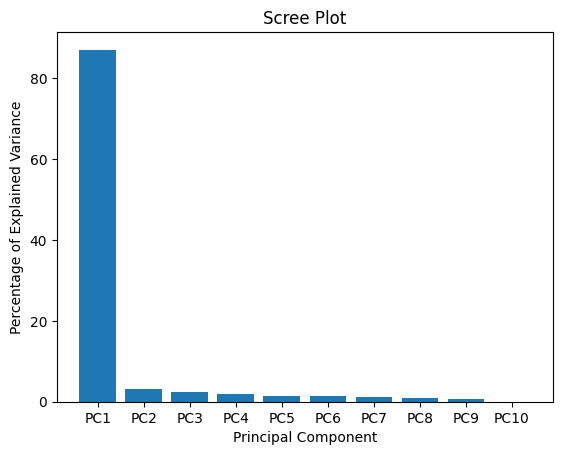

In [16]:
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [17]:
pca_df = pd.DataFrame(pca_data, index=[*wt, *ko], columns=labels)

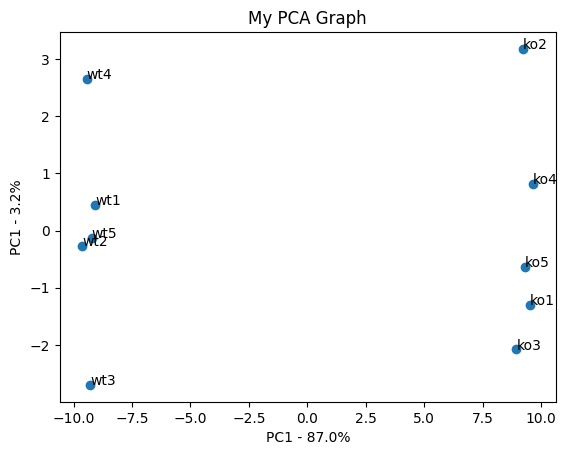

In [18]:
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC1 - {0}%'.format(per_var[1]))

for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))

plt.show()